# Name :- Yash Gupta
# Roll No. :- 2301560069
# Course :- MCA
# Subject :- AIML

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the Data set

In [87]:
train_data = pd.read_csv("E:\\KRMU\\Subject\\Aiml\\Assignment 4\\Titanic_Survival_train.csv")
test_data = pd.read_csv("E:\\KRMU\\Subject\\Aiml\\Assignment 4\\Titanic_Survival_test.csv")  

In [88]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
# Explore the dataset
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  875 non-null    int64  
 1   Survived     875 non-null    int64  
 2   Pclass       875 non-null    int64  
 3   Name         875 non-null    object 
 4   Sex          875 non-null    object 
 5   Age          700 non-null    float64
 6   SibSp        875 non-null    int64  
 7   Parch        875 non-null    int64  
 8   Ticket       875 non-null    object 
 9   Fare         875 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     873 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.2+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,875.000000,875.000000,875.000000,700.000000,875.000000,875.000000,875.000000
mean,438.000000,0.385143,2.306286,29.741671,0.531429,0.378286,32.437304
std,252.735039,0.486907,0.836739,14.599790,1.110531,0.794566,50.052411
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,219.500000,0.000000,2.000000,20.375000,0.000000,0.000000,7.925000
50%,438.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,656.500000,1.000000,3.000000,38.250000,1.000000,0.000000,31.275000
max,875.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
# Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            175
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          674
Embarked         2
dtype: int64

In [91]:
# Handle missing values (e.g., fill or drop)
# Example: fill missing age values with the mean
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [92]:
# Drop irrelevant columns (e.g., Name, Ticket, Cabin)
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [93]:
# Convert categorical variables to numerical (e.g., Sex, Embarked)
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [94]:
# Handling remaining missing values
# Example: fill missing Embarked values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [95]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
870,871,0,3,0,26.0,0,0,7.8958,0.0
871,872,1,1,1,47.0,1,1,52.5542,0.0
872,873,0,1,0,33.0,0,0,5.0000,0.0
873,874,0,3,0,47.0,0,0,9.0000,0.0


<Axes: xlabel='Age', ylabel='Count'>

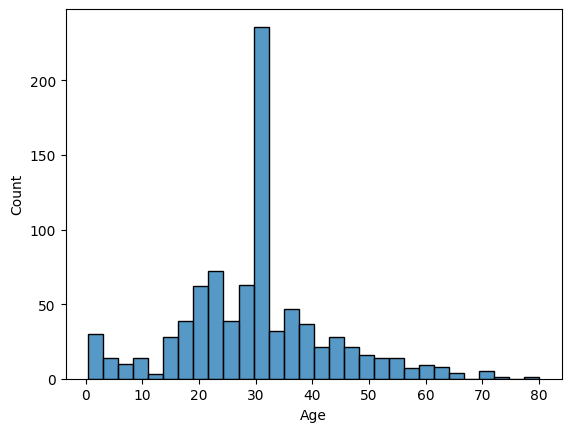

In [96]:
sns.histplot(train_data['Age'])
# This function displays the frequency distribution of the 'Age' column, i.e., the number of passengers in each age group.

Sex


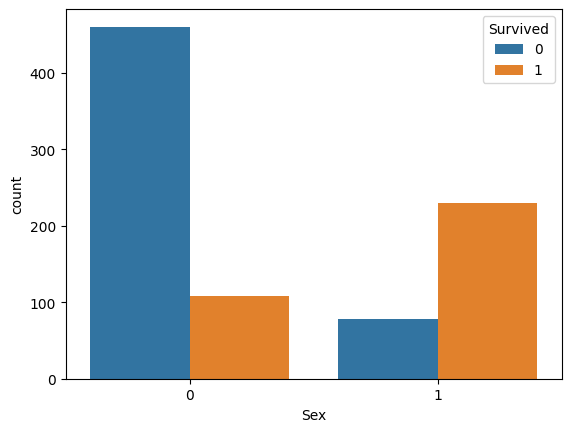


Embarked


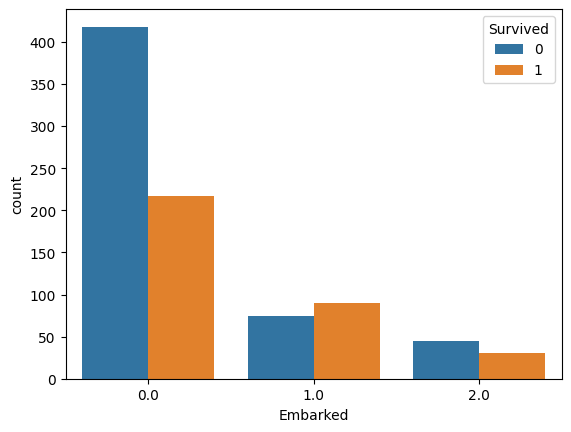


Pclass


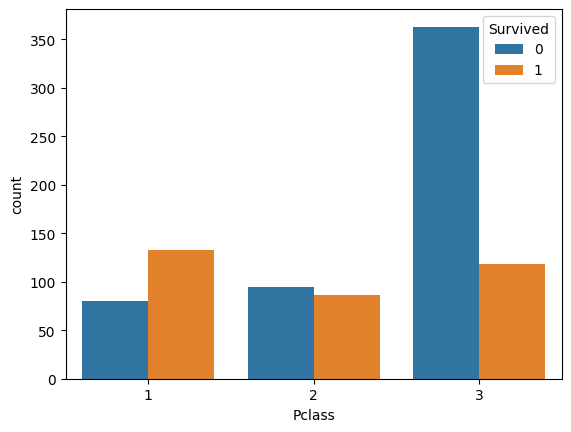


SibSp


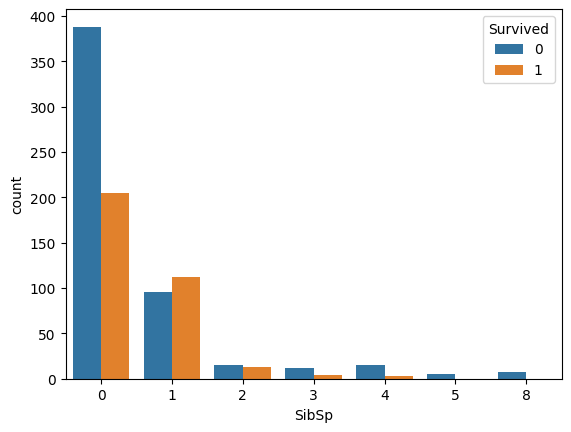


Parch


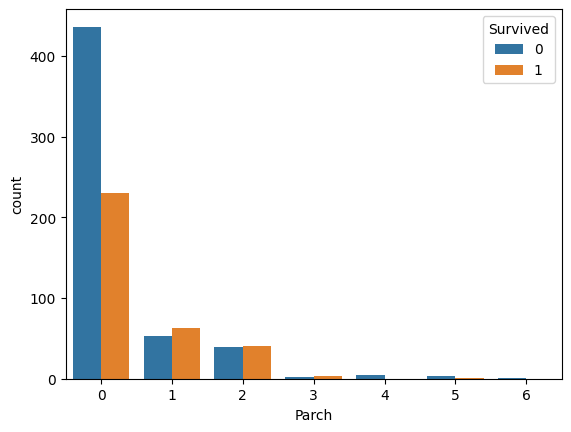

In [97]:
for column_name in ['Sex','Embarked','Pclass', 'SibSp', 'Parch']:
    print(column_name)
    sns.countplot(data=train_data, x=column_name, hue='Survived')
    plt.show()
    print("")
#  The count of passengers who survived and who did not survive is displayed for each different value of the specified column

In [98]:
# Scale numerical features
scaler = StandardScaler()
features_to_scale = ['Age', 'Fare']
train_data[features_to_scale] = scaler.fit_transform(train_data[features_to_scale])


In [99]:
# Split the data into features (X) and target variable (y)
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
# Create KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

#  Evaluate the Model

In [101]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.7885714285714286
Confusion Matrix:
[[89 16]
 [21 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.75      0.70      0.73        70

    accuracy                           0.79       175
   macro avg       0.78      0.77      0.78       175
weighted avg       0.79      0.79      0.79       175



#  Showcase the Model on New Data

In [111]:
new_data=pd.read_csv("E:\\KRMU\\Subject\\Aiml\\Assignment 4\\New_Data.csv")
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
1,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
2,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
3,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
4,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
5,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
6,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
7,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
8,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
9,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [112]:
new_data['Age'].fillna(new_data['Age'].mean(), inplace=True)

new_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

new_data['Sex'] = new_data['Sex'].map({'male': 0, 'female': 1})
new_data['Embarked'] = new_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

new_data['Embarked'].fillna(new_data['Embarked'].mode()[0], inplace=True)

In [115]:
new_data = new_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

new_data.loc[:, features_to_scale] = scaler.transform(new_data.loc[:, features_to_scale])

# Make predictions on new_data
new_predictions = knn_model.predict(new_data)

print("Predictions for new data:")
print(new_predictions)

Predictions for new data:
[1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1]
